# **Website Data Analysis**

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Uploading And Displaying Data

website_df = pd.read_csv('website_data.csv')
website_df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [3]:
#Setting 0 Index as Heading/Renaming columns

website_df.columns = website_df.iloc[0]
website_df = website_df.drop(index=0).reset_index(drop=True)
website_df.columns = ['Channel_Group', 'DateHour', 'Users',	'Sessions',	'Engaged sessions',	'Average engagement time per session',	'Engaged sessions per user',	'Events per session',	'Engagement rate',	'Event count']
website_df.head()

,Channel_Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [4]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel_Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [17]:
#Setting DateHour Column in datetime format

website_df['DateHour'] = pd.to_datetime(website_df['DateHour'], format="%Y%m%d%H", errors='coerce')
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel_Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [18]:
#Seprating Date and hours in different columns 

numeric_col = website_df.columns.drop(['Channel_Group', 'DateHour'])
website_df[numeric_col] = website_df[numeric_col].apply(pd.to_numeric, errors='coerce')
website_df['Hour'] = website_df['DateHour'].dt.hour

In [7]:
website_df.head(10)

,Channel_Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
5,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
6,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
7,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22
8,Organic Social,2024-04-13 21:00:00,152,178,96,30.488764,0.631579,5.056180,0.539326,900,21
9,Organic Social,2024-04-15 16:00:00,151,211,93,64.165877,0.615894,4.317536,0.440758,911,16


In [8]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel_Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [9]:
#Description Of Data

website_df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


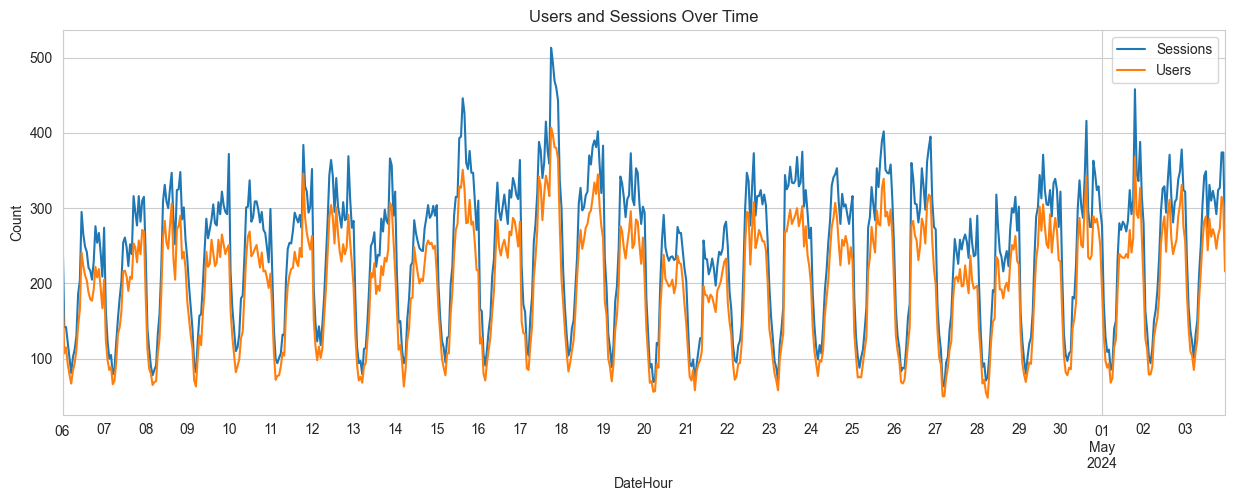

In [10]:
#What patterns or trends can you observe in website sessions and users over time?

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
website_df.groupby('DateHour')[['Sessions', 'Users']].sum().plot(ax=plt.gca())
plt.title('Users and Sessions Over Time')
plt.xlabel('DateHour')
plt.ylabel('Count')
plt.show()

**The chart reveals that the peak hours for both users and sessions consistently occur between 17:00 and 19:00 each day, showing the highest traffic during this window.**

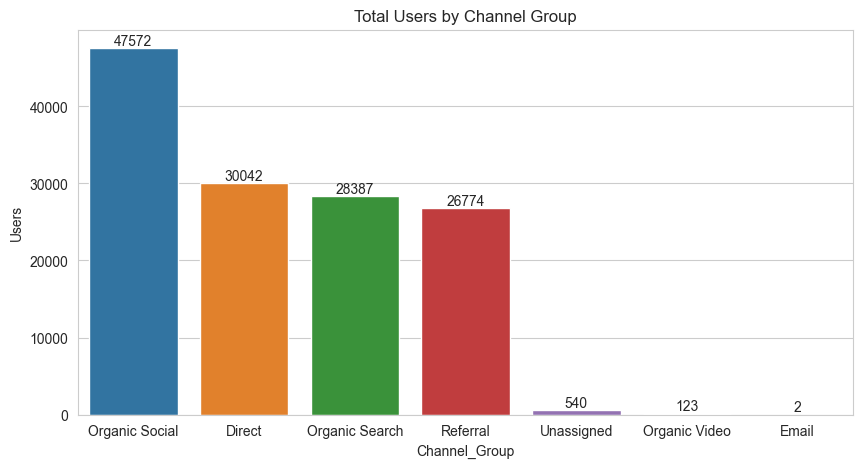

In [11]:
#Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

plt.figure(figsize=(10, 5))
grp_df = website_df.groupby('Channel_Group')['Users'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(data=grp_df, x='Channel_Group', y='Users', hue='Channel_Group', dodge=False, palette='tab10')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Total Users by Channel Group')    
plt.show()

**Organic Social is the top-performing channel, driving the highest number of users (47,572) to the website, followed by Direct and Organic Search. Email and Organic Video channels contribute minimally to overall user traffic.**

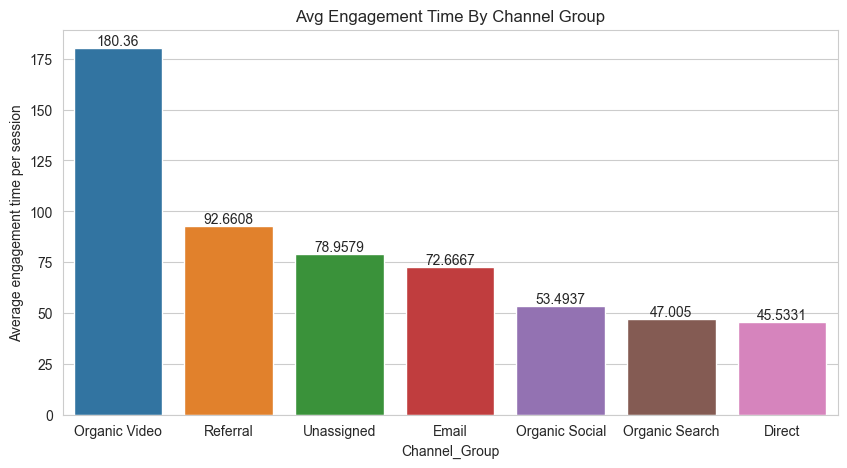

In [12]:
#Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

plt.figure(figsize=(10,5))
grp_plt1 = website_df.groupby('Channel_Group')['Average engagement time per session'].mean().sort_values(ascending=False).reset_index()

ax = sns.barplot(x='Channel_Group', y='Average engagement time per session', data=grp_plt1, hue='Channel_Group', dodge=False, palette='tab10')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Avg Engagement Time By Channel Group')
plt.show()

**Organic Video leads with the highest average engagement time per session (180.36 seconds), indicating users spend substantially longer interacting with video content than any other channel. Referral and Email channels also show relatively strong engagement compared to social and direct sources.**

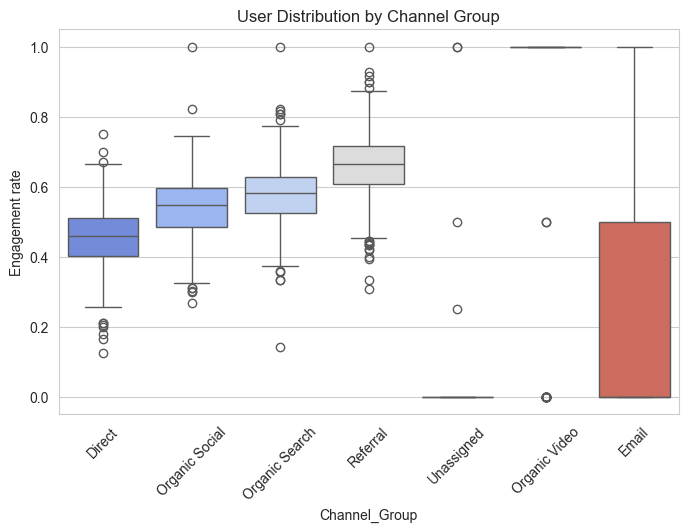

In [13]:
#How does engagement rate vary across different traffic channels?

plt.figure(figsize=(8,5))
sns.boxplot(data=website_df, x="Channel_Group", y="Engagement rate", palette="coolwarm", hue='Channel_Group')

plt.title("User Distribution by Channel Group")
plt.xticks(rotation=45)
plt.show()

**Referral and Organic Search channels have the highest median engagement rates, demonstrating strong user interaction compared to other channels. Email shows wide variability, with some sessions achieving maximum engagement but also many low performers**

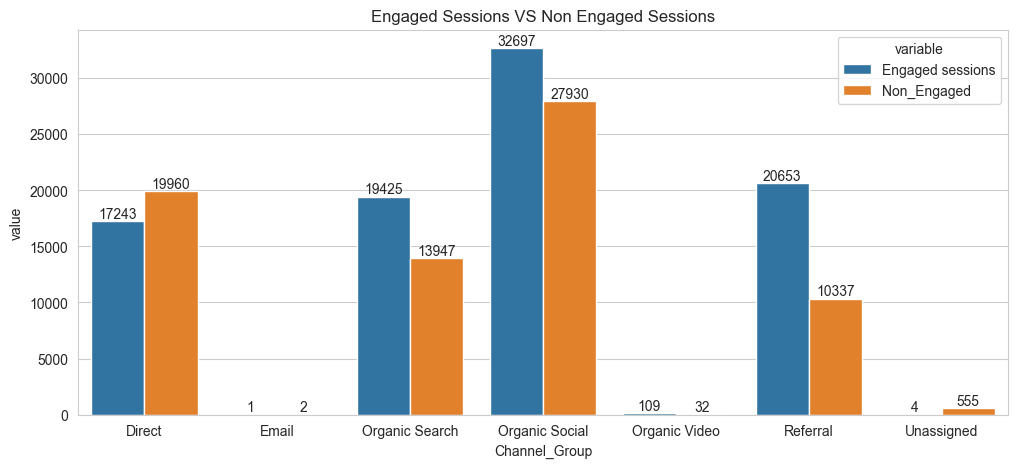

In [14]:
#Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

session_df = website_df.groupby('Channel_Group')[['Sessions', 'Engaged sessions']].sum().reset_index()
session_df['Non_Engaged'] = session_df['Sessions'] - session_df['Engaged sessions']
session_df_melted = session_df.melt(id_vars='Channel_Group', value_vars=['Engaged sessions', 'Non_Engaged'])

plt.figure(figsize=(12,5))
ax = sns.barplot(data=session_df_melted, x='Channel_Group', y='value', hue='variable')
plt.title('Engaged Sessions VS Non Engaged Sessions')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

**Organic Social and Referral channels have the highest number of engaged sessions, significantly outperforming other channels in user engagement. In contrast, Email and Unassigned channels show minimal engaged activity, indicating a need for enhanced engagement strategies**

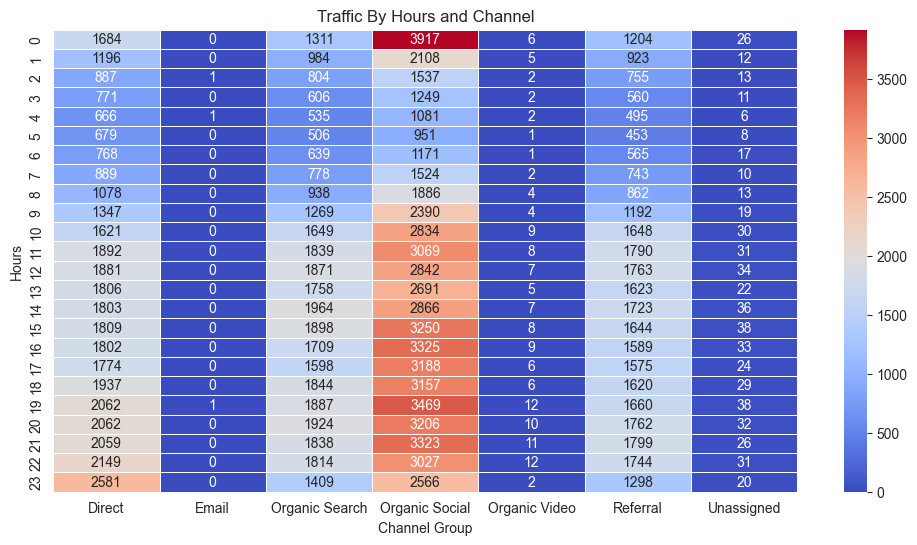

In [15]:
#At what hours of the day does each channel drive the most traffic?

heatmap_df = website_df.groupby(['Hour', 'Channel_Group'])['Sessions'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.0f', cbar=True)
plt.title('Traffic By Hours and Channel')
plt.xlabel('Channel Group')
plt.ylabel('Hours')
plt.show()

**Organic Social consistently generates the highest traffic between 0:00 and 20:00 hours, peaking at 3,917 users at midnight and maintaining strong activity throughout the day. Other channels show moderate traffic, but Direct, Organic Search, and Referral also have increased counts during late evening hours.**

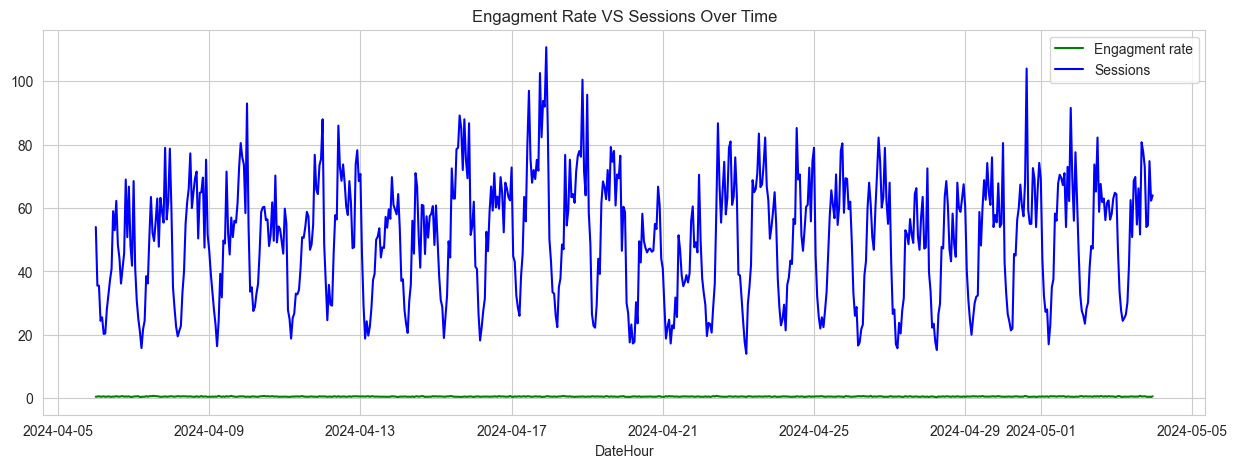

In [16]:
#s there any correlation between high traffic (sessions) and high engagement rate over time?

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df_plot = website_df.groupby('DateHour')[['Engagement rate', 'Sessions']].mean().reset_index()
plt.plot(df_plot['DateHour'], df_plot['Engagement rate'], label='Engagment rate', color='green')
plt.plot(df_plot['DateHour'], df_plot['Sessions'], label='Sessions', color='blue')
plt.title('Engagment Rate VS Sessions Over Time')
plt.xlabel('DateHour')
plt.legend()
plt.grid(True)
plt.show()

**There is no clear correlation between engagement rate and session volume over time, as engagement rate remains low and stable while sessions fluctuate with pronounced peaks and troughs. Session trends do not appear to drive significant changes in engagement rate during the observed period.**


# **Conclusion**

**Based on the analyzed graphs, Organic Social is the primary driver of website traffic, generating the highest user count and engaged sessions. However, Organic Video leads in average engagement time, highlighting the importance of video content for deeper user interaction. Engagement rates vary across channels, with Referral and Organic Search showing strong user engagement, while Email and Unassigned channels need improvement. Peak traffic occurs consistently in the late afternoon to early evening, but engagement rates remain relatively stable regardless of session volume, suggesting content quality and relevance are crucial for sustained user engagement.**